In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words = 10000)

In [3]:
len(Xt)

25000

In [4]:
print(XT[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
word_idx = imdb.get_word_index()

In [6]:
print(len(word_idx.items()))

88584


In [0]:
idx_word = dict([value,key] for (key,value) in word_idx.items())

In [0]:
actual_review0 = ' '.join([idx_word.get(idx-3,'?') for idx in Xt[1]])

In [33]:
print(actual_review0)

? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the ? moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual ? and desperation be patient ? up the atmosphere and pay attentio

In [0]:
def vectorize_sentences(sentences,dim=10000):
  outputs = np.zeros((len(sentences),dim))
  for i, idx in enumerate(sentences):
    outputs[i,idx] = 1

  return outputs


In [0]:
import numpy as np

In [0]:
X_train = vectorize_sentences(XT)

In [0]:
X_test = vectorize_sentences(Xt)

In [14]:
print(X_train.shape,X_test.shape)

(25000, 10000) (25000, 10000)


In [0]:
Y_train = np.asarray(YT).astype('float32')
Y_test = np.asarray(Yt).astype('float32')

In [0]:
from keras import models
from keras.layers import Dense

In [17]:
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
X_val = X_train[:5000]
X_train_new = X_train[5000:]

Y_val = Y_train[:5000]
Y_train_new = Y_train[5000:]

In [21]:
hist = model.fit(X_train,Y_train,epochs = 4, batch_size = 512,validation_data=(X_val,Y_val))




Train on 25000 samples, validate on 5000 samples
Epoch 1/4





25000/25000 [==============================] - 2s 83us/step - loss: 0.4436 - acc: 0.8246 - val_loss: 0.3078 - val_acc: 0.8822
Epoch 2/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2527 - acc: 0.9106 - val_loss: 0.1931 - val_acc: 0.9390
Epoch 3/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.1956 - acc: 0.9301 - val_loss: 0.1519 - val_acc: 0.9540
Epoch 4/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.1645 - acc: 0.9418 - val_loss: 0.1279 - val_acc: 0.9598


In [0]:
import matplotlib.pyplot as plt

In [0]:
h = hist.history

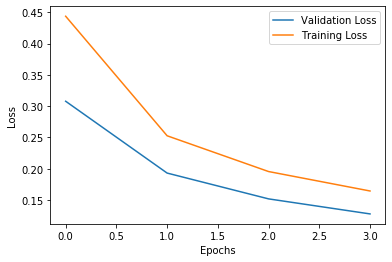

In [24]:
plt.plot(h['val_loss'],label = 'Validation Loss')
plt.plot(h['loss'], label = 'Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

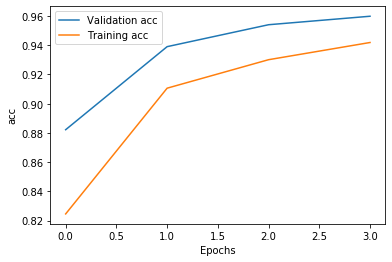

In [25]:
plt.plot(h['val_acc'],label = 'Validation acc')
plt.plot(h['acc'], label = 'Training acc')
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [26]:
model.evaluate(X_test,Y_test)[1]

25000/25000 [==============================] - 2s 62us/step


0.88292

In [27]:
model.evaluate(X_train,Y_train)[1]

25000/25000 [==============================] - 2s 62us/step


0.96008

In [34]:
model.predict(X_train)

array([[0.9893762 ],
       [0.00249079],
       [0.00196025],
       ...,
       [0.02283037],
       [0.98252463],
       [0.10969445]], dtype=float32)